# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [1]:
! git clone https://github.com/DS3001/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 34 (delta 4), reused 1 (delta 1), pack-reused 23
Receiving objects: 100% (34/34), 7.18 MiB | 11.93 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [24]:
from pickle import FRAME
#Q1

#1
frame = pd.read_csv('/content/visualization/assignment/data/college_completion.csv')

#2
frame.shape
frame.head()
#Some variables included are School Name, City, State, Level, and Control
#The dataframe is 3798 rows by 63 columns -> 63 variables, 3798 observations

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [25]:
#3
print(pd.crosstab(frame['control'],frame['level']))
print("-split-")
print(pd.crosstab(frame['control'],frame['level'], normalize = 'all'))

#The most common institutions are 4-year private not for profit schools, with the least common being 2-year private not for profit schools
#Most private schools are 4-year programs, while most public schools are 2-year programs
#Public schools make up ~40% of schools while private schools are the other 60%

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632
-split-
level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403


count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

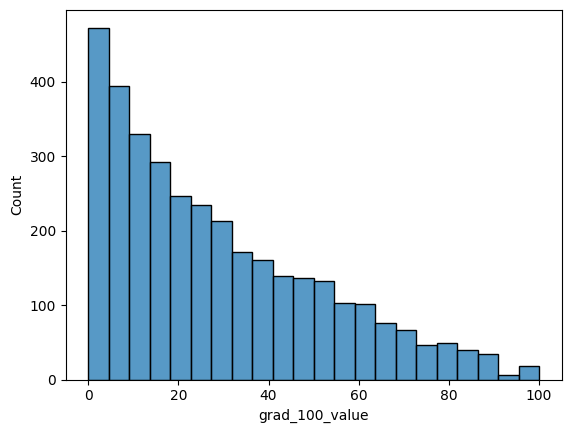

In [52]:
#4
sns.histplot(frame['grad_100_value'])
#sns.kdeplot(frame['grad_100_value'])
#sns.boxplot(frame['grad_100_value'])
frame['grad_100_value'].describe()

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

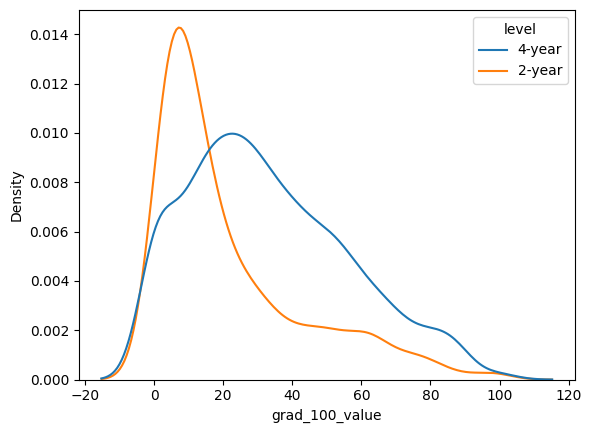

In [29]:
#5
#sns.kdeplot(data=frame,x='grad_100_value',hue='control')
sns.kdeplot(data=frame,x='grad_100_value',hue='level')
frame.loc[:,['control','grad_100_value']].groupby('control').describe()
frame.loc[:,['level','grad_100_value']].groupby('level').describe()
#4 year graduation rates are 10ish points higher than 2 year graduation rates, and have the best rates overall

grad_100_value                             \
                                       count       mean        std  min   
level  control                                                            
2-year Private for-profit              461.0  37.197614  25.497380  0.0   
       Private not-for-profit           68.0  41.913235  28.348302  0.0   
       Public                          926.0  12.400000  10.893600  0.0   
4-year Private for-profit              318.0  17.382704  20.788525  0.0   
       Private not-for-profit         1121.0  41.645674  23.243453  0.0   
       Public                          573.0  25.561082  16.403902  0.0   

                                                            
                                  25%   50%     75%    max  
level  control                                              
2-year Private for-profit      15.800  33.9  57.800  100.0  
       Private not-for-profit  16.225  44.4  61.200  100.0  
       Public                   5.100   9.4  16.175   97.8  
4-year Private for-profit       0.000  12.5  26.325  100.0  
       Private not-for-profit  25.000  41.0  57.800  100.0  
       Public                  13.600  21.8  33.800   86.3

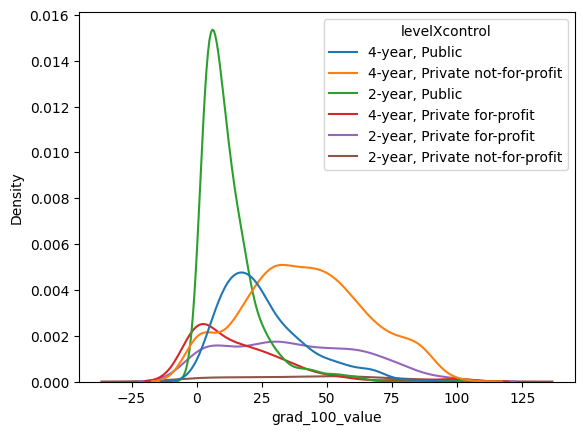

In [31]:
#6
frame['levelXcontrol']=frame['level']+', '+frame['control']
sns.kdeplot(data=frame,x='grad_100_value',hue='levelXcontrol')
frame.loc[:,['level','control','grad_100_value']].groupby(['level','control']).describe()


#Private for profit 2 year schools have ~2x grad rate of private for profit 4 year schools. Public 2 year schools have the lowest graduation rates, 2year private not for profit has the
#highest max grad rate


aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

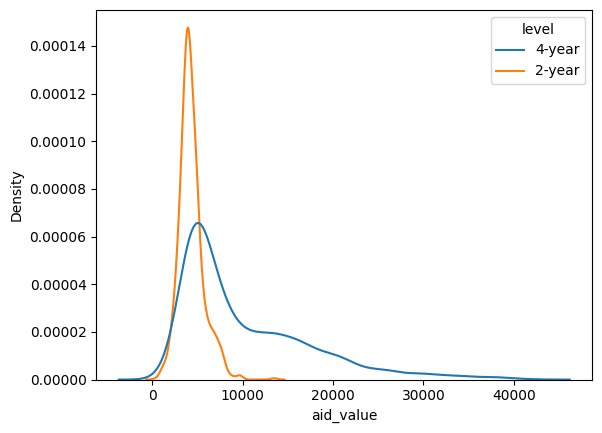

In [37]:
#7
frame['aid_arcsinh'] = np.arcsinh(frame['aid_value'])
#sns.kdeplot(data=frame,x='aid_arcsinh')
#sns.kdeplot(data=frame,x='aid_value',hue='control')
sns.kdeplot(data=frame,x='aid_value',hue='level')
#frame.loc[:,['control','aid_value']].groupby('control').describe()
frame.loc[:,['level','aid_value']].groupby('level').describe()

#4 year institutions give more aid on average, even when averaged over each year.
#Private not for profit give the most aid overall by a fairly large margin

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

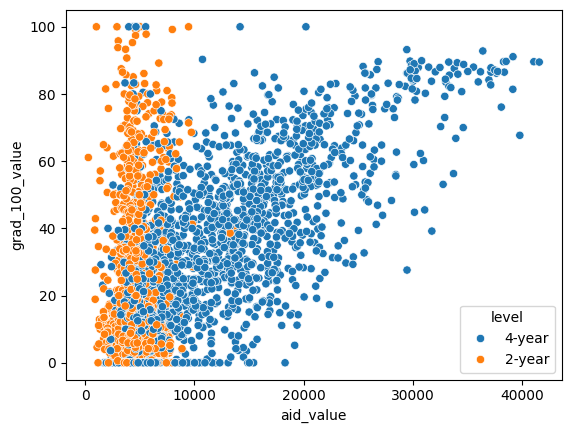

In [41]:
#8
#sns.scatterplot(data=frame,x='aid_value',y='grad_100_value')
#sns.scatterplot(data=frame,x='aid_value',y='grad_100_value',hue='control')
sns.scatterplot(data=frame,x='aid_value',y='grad_100_value',hue='level')

#Two year institutions have much lower variance in aid values than 4 year institutions
#Private not for profit have the highest variance out of all types.
#Highest grad value and aid value are all 4 year private not for profit

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

count    552.000000
mean      -2.829149
std        2.421316
min      -10.420000
25%       -3.910000
50%       -3.065000
75%       -2.237500
max       16.190000
Name: Opioid_Prscrbng_Rate_5Y_Chg, dtype: float64

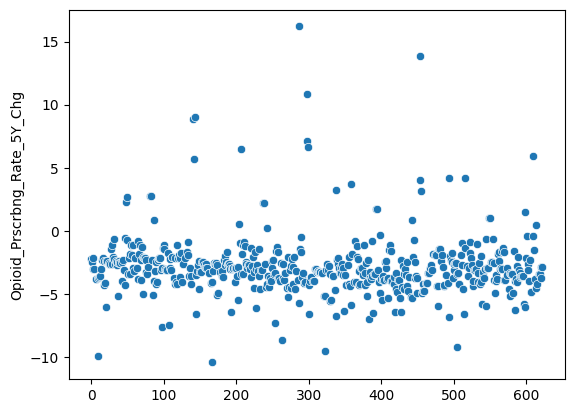

In [68]:
#1
#I chose to look at the Medicaid Opiate prescription rates by geography

#2
#There does not appear to be documentation for missing value handling. Some categorical values have possible values, but not all. This data dictionary seems very sparse,
#and somewhat difficult to interpret.

#3
#Interesting values: Opioid_Prscrbng_Rate_5Y_Chg - 5 Year change in opioid prescription rates, Opioid_Prscrbng_Rate - Opioid claims divided by overall claims, Geo_Desc - Geographic Description

#4
opd = pd.read_csv('/content/visualization/data/OMT_MDCD_R23_P11_V10_YTD21_GEO.csv')
opd.head()

#sns.boxplot(opd['Opioid_Prscrbng_Rate'])
#sns.barplot(opd['Geo_Desc'])

#There are two major outliers in the boxplot for prescription rate, and the barplot doesn't give any useful information

#5
prsc_change = opd['Opioid_Prscrbng_Rate_5Y_Chg']
prsc_change.unique()
prsc_change = pd.to_numeric(prsc_change,errors='coerce') # Typecast price to float/numeric
prsc_change.unique()
#sns.kdeplot(prsc_change)
#This plot shows that most locations have a decrease in opioid prescription rate over the last 5 years

#6
sns.scatterplot(prsc_change)
#Most locations have a negative change in opioid prescription rate with a few major outliers that have upwards of a 15% increase in the last 5 years.

#7
opd['Opioid_Prscrbng_Rate_5Y_Chg'].describe()
#Average change in prescription rate is -2.8%, the largest decrease is 10% while the largest increase is 16.2 percent. It appears that on the whole, opioid prescriptions are decreasing.
